# Import Library

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error


In [82]:
df=pd.read_excel(r"yahoo_data.xlsx")

In [83]:
df.sample()

,Date,Open,High,Low,Close*,Adj Close**,Volume
146,"Sep 28, 2022",29198.92,29811.78,29114.97,29683.74,29683.74,436040000


# Exploratory_Analysis

In [84]:
df.head(2)

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000


In [85]:
df.isna().sum()

Date           0
Open           0
High           0
Low            0
Close*         0
Adj Close**    0
Volume         0
dtype: int64

In [86]:
df.shape

(1258, 7)

In [87]:
df['Date']=pd.to_datetime(df['Date'])


In [88]:
df['Date'].duplicated().any()


False

# Extract Year, Month, Day into new columns:

In [96]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [105]:
df['Year_Month'] = df['Date'].dt.strftime('%Y-%m')
df['Year_Month'] = pd.to_datetime(df['Year_Month'], format='%Y-%m')



In [106]:
df

,Date,Open,High,Low,Close*,Adj Close**,Volume,Moving_Average,Year,Month,Day,Year_Month
0,2023-04-28,33797.43,34104.56,33728.40,34098.16,34098.16,354310000,NaN,2023,4,28,2023-04-01
1,2023-04-27,33381.66,33859.75,33374.65,33826.16,33826.16,343240000,NaN,2023,4,27,2023-04-01
2,2023-04-26,33596.34,33645.83,33235.85,33301.87,33301.87,321170000,NaN,2023,4,26,2023-04-01
3,2023-04-25,33828.34,33875.49,33525.39,33530.83,33530.83,297880000,NaN,2023,4,25,2023-04-01
4,2023-04-24,33805.04,33891.15,33726.09,33875.40,33875.40,252020000,NaN,2023,4,24,2023-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2018-05-07,24317.66,24479.45,24263.42,24357.32,24357.32,307670000,24847.657667,2018,5,7,2018-05-01
1254,2018-05-04,23865.22,24333.35,23778.87,24262.51,24262.51,329480000,24823.492333,2018,5,4,2018-05-01
1255,2018-05-03,23836.23,23996.15,23531.31,23930.15,23930.15,389240000,24784.814667,2018,5,3,2018-05-01
1256,2018-05-02,24097.63,24185.52,23886.30,23924.98,23924.98,385350000,24743.137000,2018,5,2,2018-05-01


# The closing price based on month

<Axes: title={'center': 'Closing_Price(in_month)'}, xlabel='Date'>

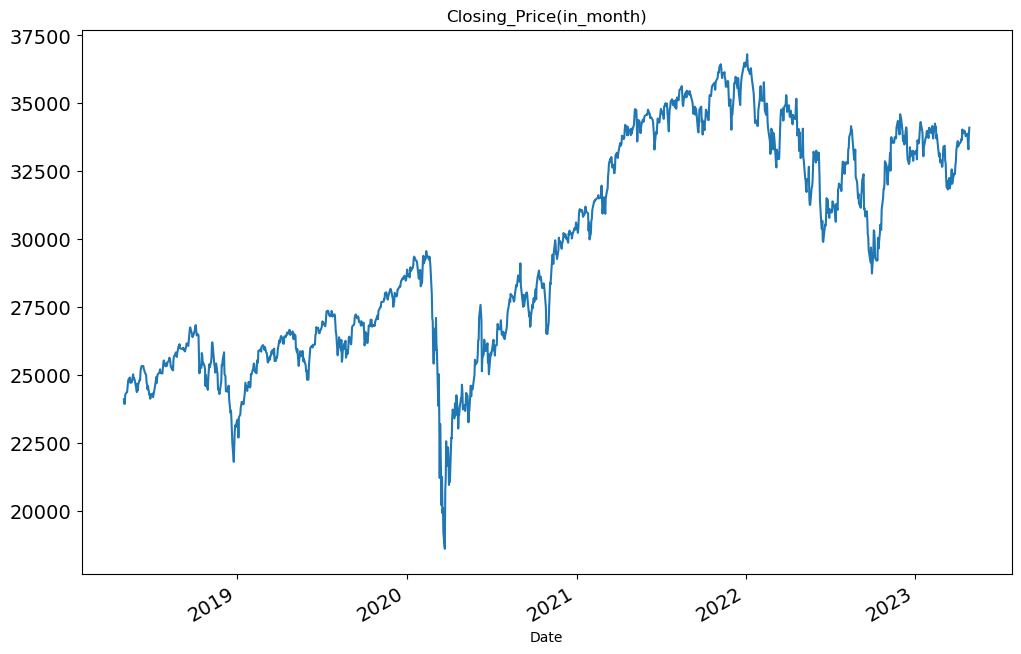

In [107]:
df1=df.groupby(['Date'])['Close*'].mean()
df1.plot(figsize=(12,8),title='Closing_Price(in_month)',fontsize=14)

<Axes: xlabel='Month'>

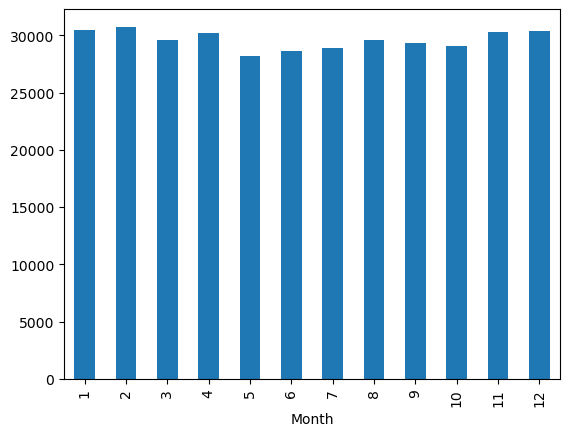

In [108]:
df.groupby('Month')['Close*'].mean().plot.bar()

<Axes: xlabel='Date'>

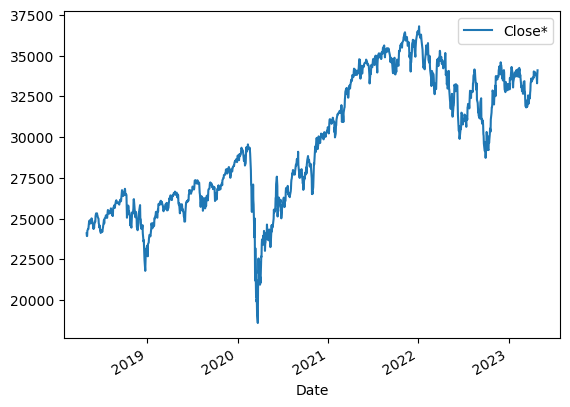

In [109]:
df.plot.line(x='Date',y='Close*')

In [110]:
df['Moving_Average']=df['Close*'].rolling(window=30).mean()

In [111]:
df

,Date,Open,High,Low,Close*,Adj Close**,Volume,Moving_Average,Year,Month,Day,Year_Month
0,2023-04-28,33797.43,34104.56,33728.40,34098.16,34098.16,354310000,NaN,2023,4,28,2023-04-01
1,2023-04-27,33381.66,33859.75,33374.65,33826.16,33826.16,343240000,NaN,2023,4,27,2023-04-01
2,2023-04-26,33596.34,33645.83,33235.85,33301.87,33301.87,321170000,NaN,2023,4,26,2023-04-01
3,2023-04-25,33828.34,33875.49,33525.39,33530.83,33530.83,297880000,NaN,2023,4,25,2023-04-01
4,2023-04-24,33805.04,33891.15,33726.09,33875.40,33875.40,252020000,NaN,2023,4,24,2023-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2018-05-07,24317.66,24479.45,24263.42,24357.32,24357.32,307670000,24847.657667,2018,5,7,2018-05-01
1254,2018-05-04,23865.22,24333.35,23778.87,24262.51,24262.51,329480000,24823.492333,2018,5,4,2018-05-01
1255,2018-05-03,23836.23,23996.15,23531.31,23930.15,23930.15,389240000,24784.814667,2018,5,3,2018-05-01
1256,2018-05-02,24097.63,24185.52,23886.30,23924.98,23924.98,385350000,24743.137000,2018,5,2,2018-05-01


<Axes: xlabel='Date'>

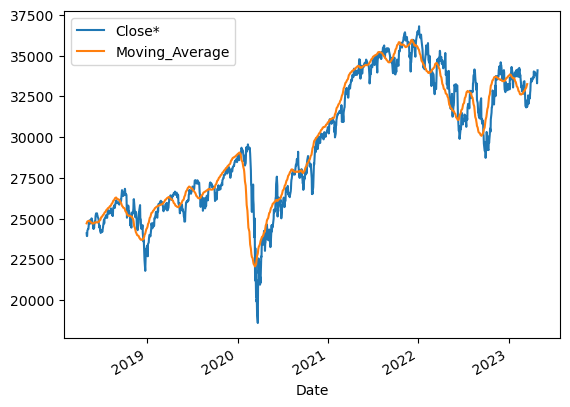

In [112]:
df.plot.line(x='Date',y=['Close*','Moving_Average'])

# Correlation

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1258 non-null   datetime64[ns]
 1   Open            1258 non-null   float64       
 2   High            1258 non-null   float64       
 3   Low             1258 non-null   float64       
 4   Close*          1258 non-null   float64       
 5   Adj Close**     1258 non-null   float64       
 6   Volume          1258 non-null   int64         
 7   Moving_Average  1229 non-null   float64       
 8   Year            1258 non-null   int32         
 9   Month           1258 non-null   int32         
 10  Day             1258 non-null   int32         
 11  Year_Month      1258 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(6), int32(3), int64(1)
memory usage: 103.3 KB


<Axes: >

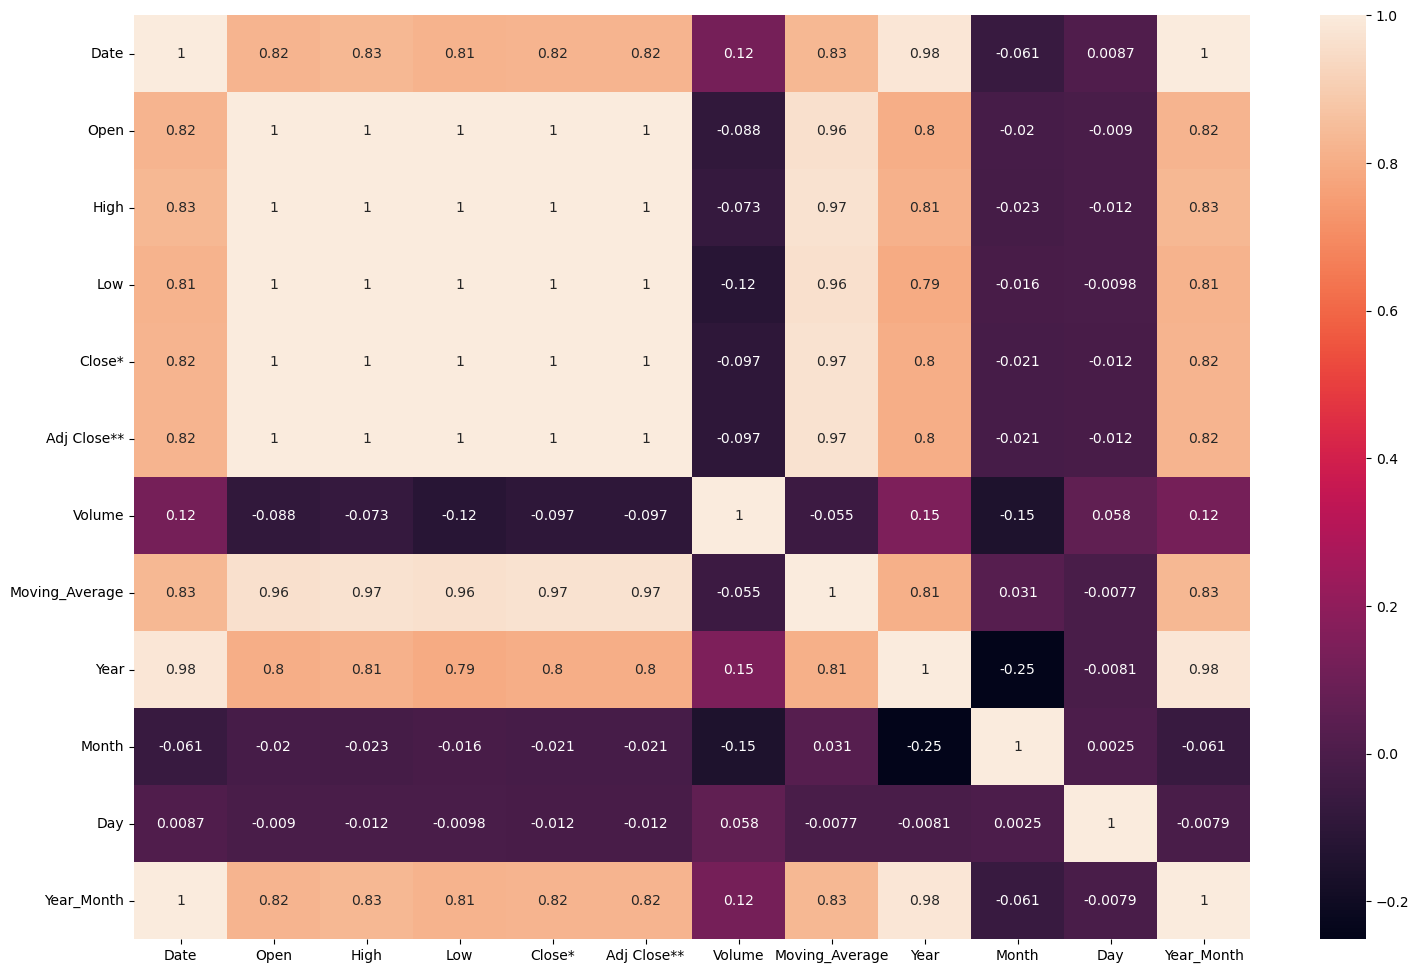

In [115]:
corr=df.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr,annot=True)

- Training dataset is 80% of the total dataset while the test dataset the remaining 20%

In [20]:
df.sample()

,Date,Open,High,Low,Close*,Adj Close**,Volume,Moving_Average
563,"Feb 02, 2021",30276.88,30840.54,30276.88,30687.48,30687.48,333160000,31592.526


In [21]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Adj Close**'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.420441252350836
p-value: 0.5724380460701354


#  4. Forecasting Models

In [23]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Adj Close**'], order=(5,1,0))  # Adjust p,d,q based on ACF/PACF
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)

In [28]:
from prophet import Prophet

df1 = df.reset_index()[['Date', 'Adj Close**']]
df1.columns = ['ds', 'y']
model = Prophet()
model.fit(df1)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

12:05:23 - cmdstanpy - INFO - Chain [1] start processing
12:05:23 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-05-01,24717.036917,23930.316491,26222.640657,24717.036917,24717.036917,370.983784,370.983784,370.983784,173.450303,173.450303,173.450303,197.533481,197.533481,197.533481,0.0,0.0,0.0,25088.020702
1,2018-05-02,24726.193147,23798.314342,26267.037041,24726.193147,24726.193147,289.986483,289.986483,289.986483,160.963838,160.963838,160.963838,129.022646,129.022646,129.022646,0.0,0.0,0.0,25016.179630
2,2018-05-03,24735.349376,23808.115003,26131.654459,24735.349376,24735.349376,212.876739,212.876739,212.876739,151.951643,151.951643,151.951643,60.925097,60.925097,60.925097,0.0,0.0,0.0,24948.226115
3,2018-05-04,24744.505605,23710.022953,26037.197734,24744.505605,24744.505605,158.928145,158.928145,158.928145,164.827473,164.827473,164.827473,-5.899327,-5.899327,-5.899327,0.0,0.0,0.0,24903.433751
4,2018-05-07,24771.974293,23535.812656,25924.483911,24771.974293,24771.974293,-33.337051,-33.337051,-33.337051,157.073995,157.073995,157.073995,-190.411045,-190.411045,-190.411045,0.0,0.0,0.0,24738.637243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,2023-05-24,32485.760499,31205.449419,33431.305033,32443.120349,32525.894409,-129.347971,-129.347971,-129.347971,160.963838,160.963838,160.963838,-290.311808,-290.311808,-290.311808,0.0,0.0,0.0,32356.412528
1284,2023-05-25,32485.732812,31205.818613,33578.761724,32435.611987,32533.515951,-102.906713,-102.906713,-102.906713,151.951643,151.951643,151.951643,-254.858356,-254.858356,-254.858356,0.0,0.0,0.0,32382.826099
1285,2023-05-26,32485.705126,31251.225105,33544.322618,32426.448874,32538.057984,-54.089079,-54.089079,-54.089079,164.827473,164.827473,164.827473,-218.916552,-218.916552,-218.916552,0.0,0.0,0.0,32431.616047
1286,2023-05-27,32485.677439,30711.615618,33149.002235,32417.008258,32546.696156,-587.546338,-587.546338,-587.546338,-404.133379,-404.133379,-404.133379,-183.412959,-183.412959,-183.412959,0.0,0.0,0.0,31898.131101


In [31]:
df.sample()

,Date,Open,High,Low,Close*,Adj Close**,Volume,Moving_Average
1172,"Aug 30, 2018",26099.01,26104.37,25934.8,25986.92,25986.92,240440000,26242.314


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df=df.sort_values(by="Date",ascending=True)
df.set_index("Date",inplace=True)
df.head()

,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,
2018-05-01,24117.29,24117.29,23808.19,24099.05,24099.05,380070000
2018-05-02,24097.63,24185.52,23886.30,23924.98,23924.98,385350000
2018-05-03,23836.23,23996.15,23531.31,23930.15,23930.15,389240000
2018-05-04,23865.22,24333.35,23778.87,24262.51,24262.51,329480000
2018-05-07,24317.66,24479.45,24263.42,24357.32,24357.32,307670000


In [5]:
df

,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,
2018-05-01,24117.29,24117.29,23808.19,24099.05,24099.05,380070000
2018-05-02,24097.63,24185.52,23886.30,23924.98,23924.98,385350000
2018-05-03,23836.23,23996.15,23531.31,23930.15,23930.15,389240000
2018-05-04,23865.22,24333.35,23778.87,24262.51,24262.51,329480000
2018-05-07,24317.66,24479.45,24263.42,24357.32,24357.32,307670000
...,...,...,...,...,...,...
2023-04-24,33805.04,33891.15,33726.09,33875.40,33875.40,252020000
2023-04-25,33828.34,33875.49,33525.39,33530.83,33530.83,297880000
2023-04-26,33596.34,33645.83,33235.85,33301.87,33301.87,321170000


# Feature engineering

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1258 non-null   object 
 1   Open         1258 non-null   float64
 2   High         1258 non-null   float64
 3   Low          1258 non-null   float64
 4   Close*       1258 non-null   float64
 5   Adj Close**  1258 non-null   float64
 6   Volume       1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [30]:
df.isna().sum()

Date           0
Open           0
High           0
Low            0
Close*         0
Adj Close**    0
Volume         0
dtype: int64

In [31]:
df['Date']=pd.to_datetime(df['Date'])
df=df.sort_values(by='Date',ascending=True)
df.set_index("Date",inplace=True)
df.head()

,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,
2018-05-01,24117.29,24117.29,23808.19,24099.05,24099.05,380070000
2018-05-02,24097.63,24185.52,23886.30,23924.98,23924.98,385350000
2018-05-03,23836.23,23996.15,23531.31,23930.15,23930.15,389240000
2018-05-04,23865.22,24333.35,23778.87,24262.51,24262.51,329480000
2018-05-07,24317.66,24479.45,24263.42,24357.32,24357.32,307670000


In [32]:
df1=df['Close*']

In [33]:
df1

Date
2018-05-01    24099.05
2018-05-02    23924.98
2018-05-03    23930.15
2018-05-04    24262.51
2018-05-07    24357.32
                ...   
2023-04-24    33875.40
2023-04-25    33530.83
2023-04-26    33301.87
2023-04-27    33826.16
2023-04-28    34098.16
Name: Close*, Length: 1258, dtype: float64

# Exploratory Data Analysis

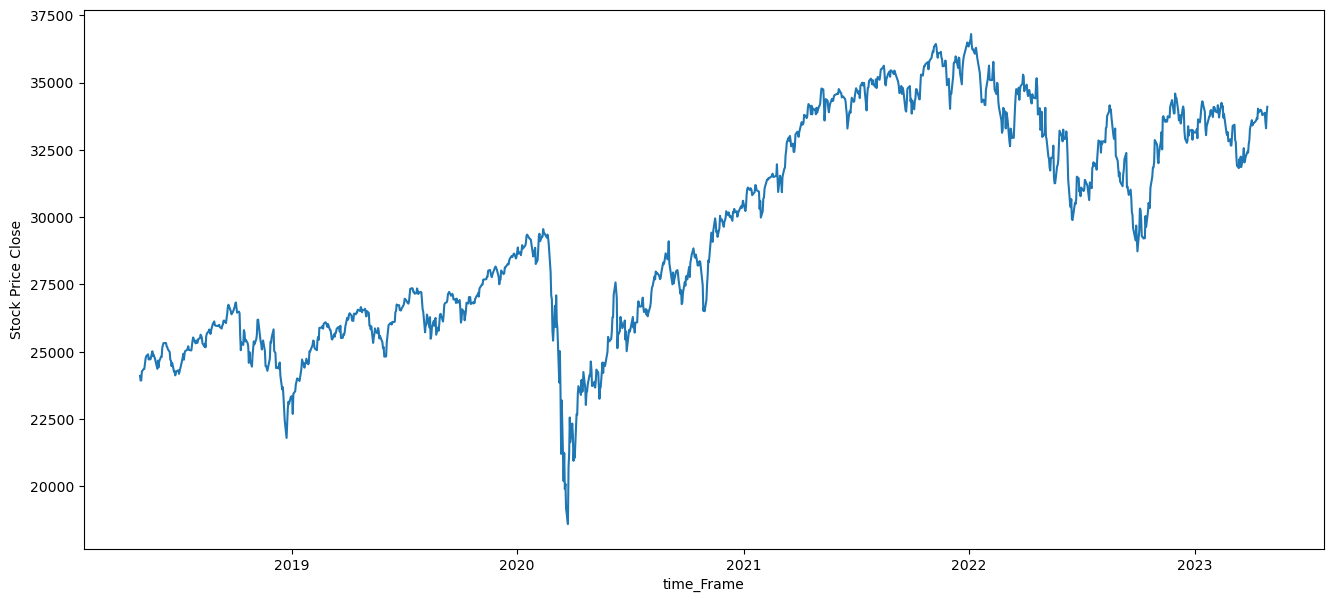

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,7))
fig=plt.figure(1)
ax1=fig.add_subplot(111)
ax1.set_xlabel("time_Frame")
ax1.set_ylabel("Stock Price Close")
ax1.plot(df1)

In [35]:
df.sample()

,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,
2019-03-29,25827.31,25949.32,25771.67,25928.68,25928.68,300620000


In [36]:
df.rename(columns={"Close*":'Close','Adj Close**':'Adj Close'},inplace=True)

In [37]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

C:\Users\assis\AppData\Local\Temp\ipykernel_25248\4442843.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)
C:\Users\assis\AppData\Local\Temp\ipykernel_25248\4442843.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\assis\AppData\Local\Temp\ipykernel_25248\4442843.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (a

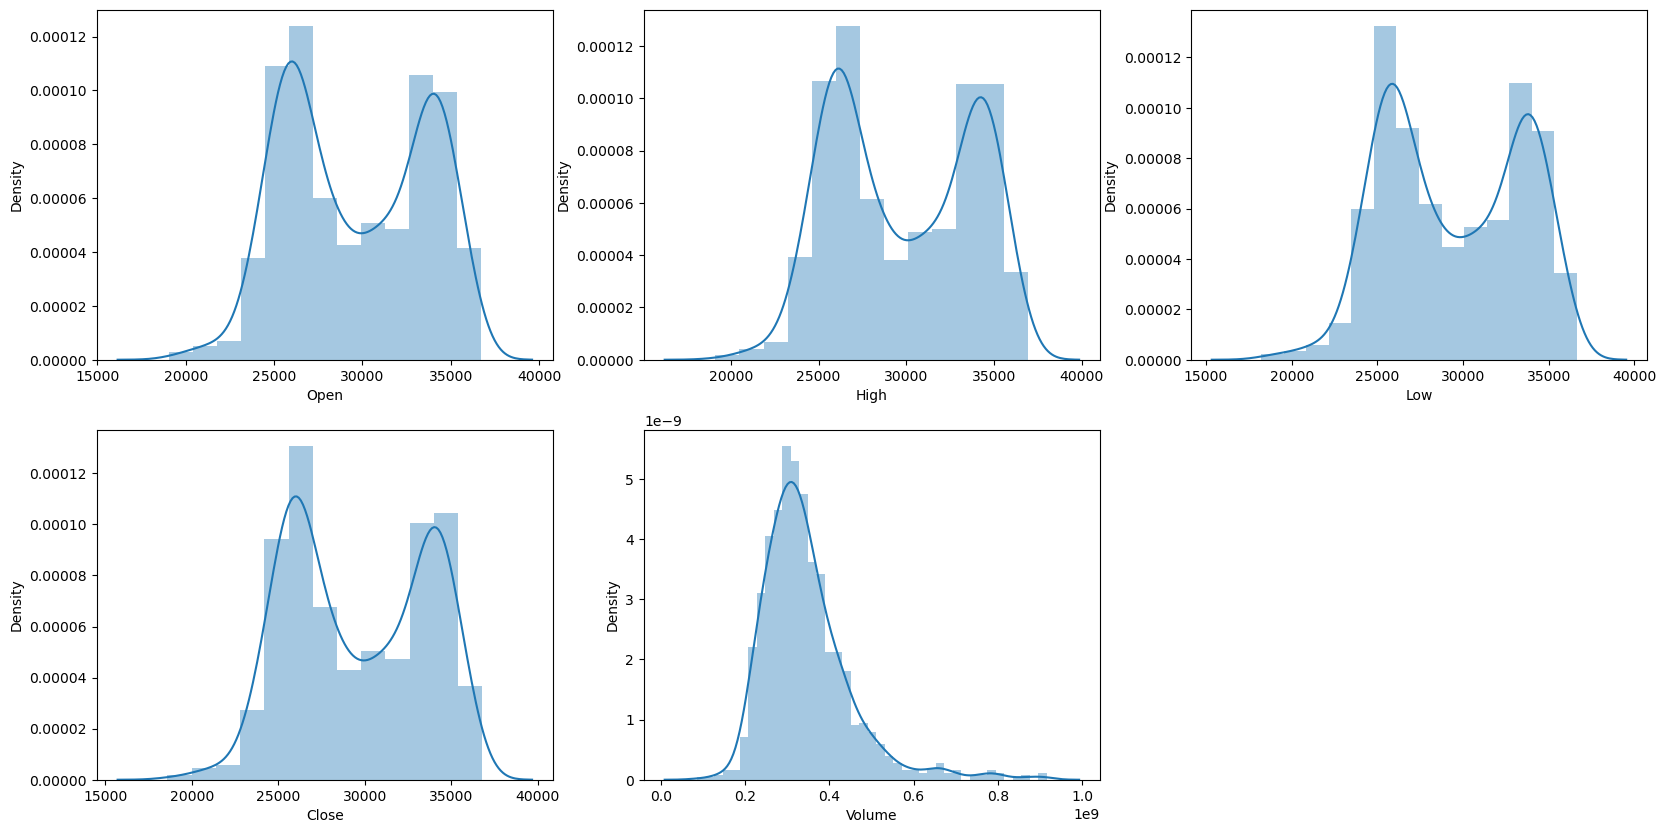

In [38]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.distplot(df[col])
plt.show()

C:\Users\assis\AppData\Local\Temp\ipykernel_25248\2993874839.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


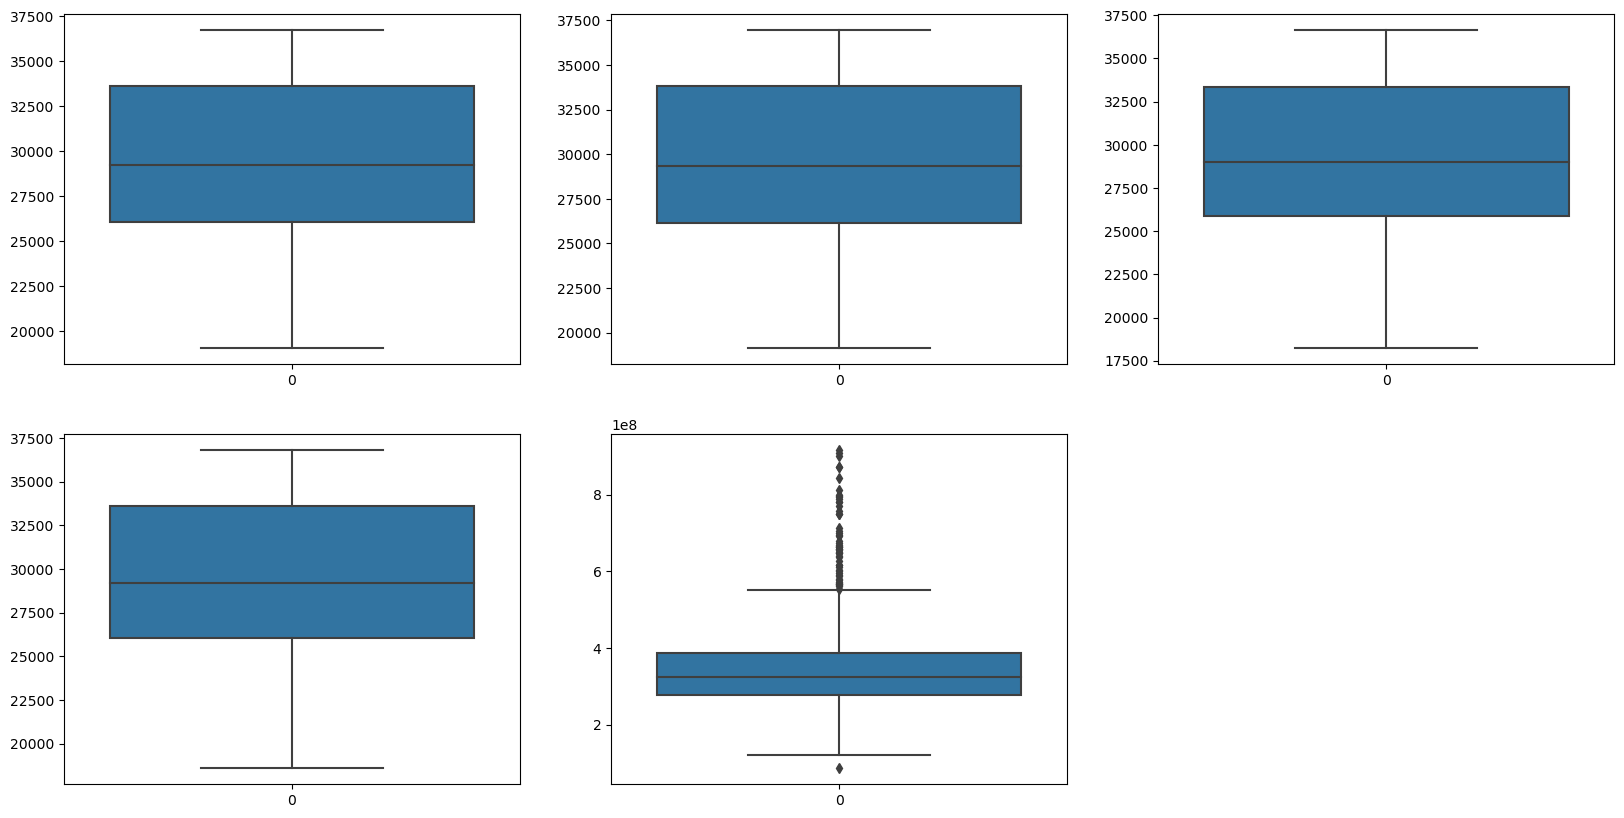

In [39]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[col])
plt.show()

# Feature Engineering

In [18]:
df.sample()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-04,29989.56,30218.26,29989.56,30218.26,30218.26,356590000


In [65]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

In [66]:
aapl_df = yf.download('AAPL', 
                      start='2019-01-01', 
                      end='2021-06-12', 
                      progress=False,
)
print(aapl_df.head())

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2019-01-02  37.667187  37.889013  36.787045  36.944469  148158800
2019-01-03  33.915249  34.757226  33.869929  34.342199  365248800
2019-01-04  35.363071  35.432244  34.299271  34.473390  234428400
2019-01-07  35.284359  35.499030  34.800162  35.468021  219111200
2019-01-08  35.956993  36.212212  35.425093  35.673153  164101200


<Axes: title={'center': "APPLE's stock price"}, xlabel='Date'>

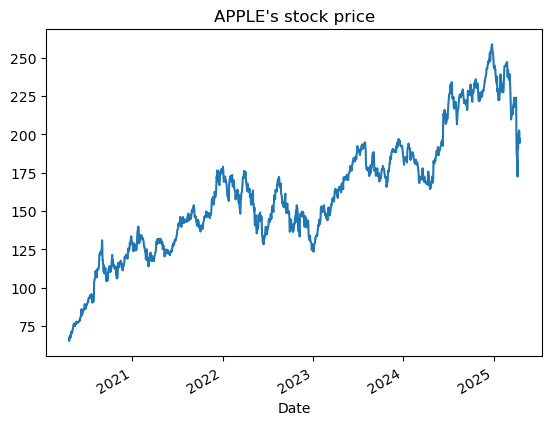

In [67]:
ticker = yf.Ticker('AAPL')
aapl_df = ticker.history(period="5y")
aapl_df['Close'].plot(title="APPLE's stock price")

- There is no misssing value in side this

In [68]:
aapl_df.isna().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

# Normalize the above data set --- Min-max Scaling
- For stock prices, Min-Max Scaling (to [0,1]) or Standardization (mean=0, std=1) works best.

In [49]:
df=aapl_df

In [50]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Extract 'Close' prices (or any other column)
close_prices = df['Close'].values.reshape(-1, 1)  # Reshape for scaler

# Initialize & fit scaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(close_prices)

-- Option 2: Standardization (Better for XGBoost, Linear Models)1


In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standard_prices = scaler.fit_transform(close_prices)

In [52]:
close_prices

array([[ 67.20509338],
       [ 65.12775421],
       [ 67.00367737],
       ...,
       [202.13999939],
       [194.27000427],
       [196.97999573]])

In [53]:
# Select features
features = ['Open', 'High', 'Low', 'Close', 'Volume']
data = df[features]

In [54]:
# Normalize (Min-Max Scaling)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [55]:
# Split into train/test (for LSTM)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [56]:
test_data

array([[0.5347767 , 0.53271912, 0.53280833, 0.52726562, 0.07879902],
       [0.52656506, 0.52232831, 0.52532804, 0.52233036, 0.05664506],
       [0.51710626, 0.51074856, 0.51258587, 0.5118432 , 0.12685028],
       ...,
       [0.70734009, 0.70755791, 0.70172489, 0.70767955, 0.0800599 ],
       [0.689064  , 0.69296292, 0.66321402, 0.66703038, 0.10395181],
       [0.68300676, 0.68325025, 0.6738395 , 0.6810277 , 0.08003256]])

In [58]:
scaled_data

array([[0.00549969, 0.00558388, 0.01436461, 0.01072963, 0.30412948],
       [0.0033834 , 0.        , 0.        , 0.        , 0.44931916],
       [0.        , 0.00081936, 0.00851568, 0.0096893 , 0.26666801],
       ...,
       [0.70734009, 0.70755791, 0.70172489, 0.70767955, 0.0800599 ],
       [0.689064  , 0.69296292, 0.66321402, 0.66703038, 0.10395181],
       [0.68300676, 0.68325025, 0.6738395 , 0.6810277 , 0.08003256]])

In [60]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-04-20 00:00:00-04:00,67.452631,68.357819,67.185682,67.205093,130015200,0.0,0.0
2020-04-21 00:00:00-04:00,67.047346,67.282745,64.414277,65.127754,180991600,0.0,0.0
2020-04-22 00:00:00-04:00,66.399402,67.440497,66.057231,67.003677,116862400,0.0,0.0
2020-04-23 00:00:00-04:00,66.947860,68.374814,66.705181,66.744011,124814400,0.0,0.0
2020-04-24 00:00:00-04:00,67.270628,68.680592,67.222089,68.670883,126161200,0.0,0.0
...,...,...,...,...,...,...,...
2025-04-11 00:00:00-04:00,186.100006,199.539993,186.059998,198.149994,87435900,0.0,0.0
2025-04-14 00:00:00-04:00,211.440002,212.940002,201.160004,202.520004,101352900,0.0,0.0
2025-04-15 00:00:00-04:00,201.860001,203.509995,199.800003,202.139999,51343900,0.0,0.0


# Exploratory Data Analysis:
- the data there is null or not and the shape of the data.

In [61]:
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [63]:
df.shape

(1257, 7)

# ARIMA MODEL

- ARIMA is a statistical model used for time series forecasting. It's especially good when:

- Your data is stationary (no trend/seasonality)

- You want a quick, interpretable model for trend-based prediction

# ARIMA Model Components:
- AR (AutoRegressive): Uses past values to predict the current value.

- I (Integrated): Differencing the data to make it stationary.

- MA (Moving Average): Uses past errors to improve prediction.

In [123]:
df

,Date,Open,High,Low,Close*,Adj Close**,Volume,Moving_Average,Year,Month,Day,Year_Month
0,2023-04-28,33797.43,34104.56,33728.40,34098.16,34098.16,354310000,NaN,2023,4,28,2023-04-01
1,2023-04-27,33381.66,33859.75,33374.65,33826.16,33826.16,343240000,NaN,2023,4,27,2023-04-01
2,2023-04-26,33596.34,33645.83,33235.85,33301.87,33301.87,321170000,NaN,2023,4,26,2023-04-01
3,2023-04-25,33828.34,33875.49,33525.39,33530.83,33530.83,297880000,NaN,2023,4,25,2023-04-01
4,2023-04-24,33805.04,33891.15,33726.09,33875.40,33875.40,252020000,NaN,2023,4,24,2023-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2018-05-07,24317.66,24479.45,24263.42,24357.32,24357.32,307670000,24847.657667,2018,5,7,2018-05-01
1254,2018-05-04,23865.22,24333.35,23778.87,24262.51,24262.51,329480000,24823.492333,2018,5,4,2018-05-01
1255,2018-05-03,23836.23,23996.15,23531.31,23930.15,23930.15,389240000,24784.814667,2018,5,3,2018-05-01
1256,2018-05-02,24097.63,24185.52,23886.30,23924.98,23924.98,385350000,24743.137000,2018,5,2,2018-05-01


# Visulaize the data

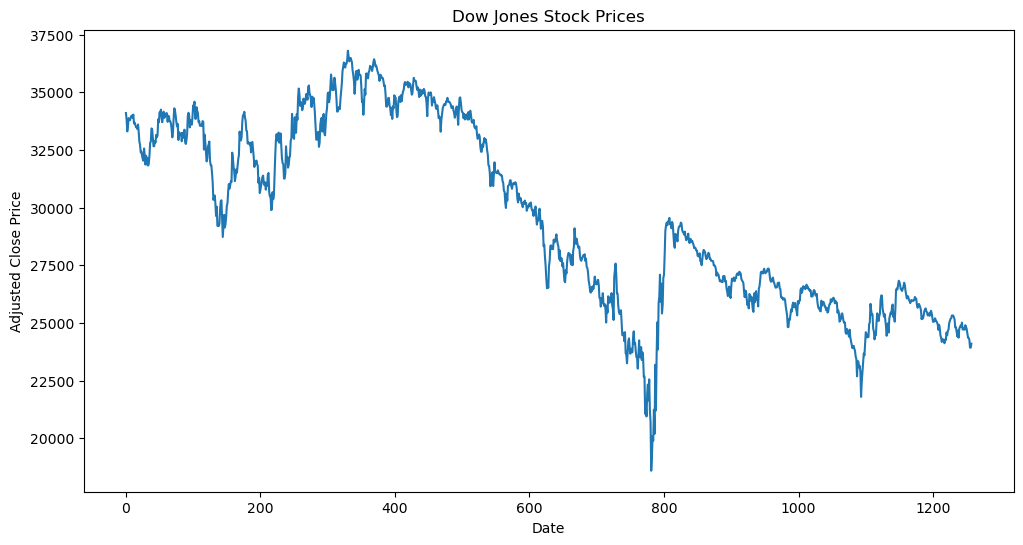

In [124]:
df['Adj Close**'].plot(figsize=(12,6), title='Dow Jones Stock Prices')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

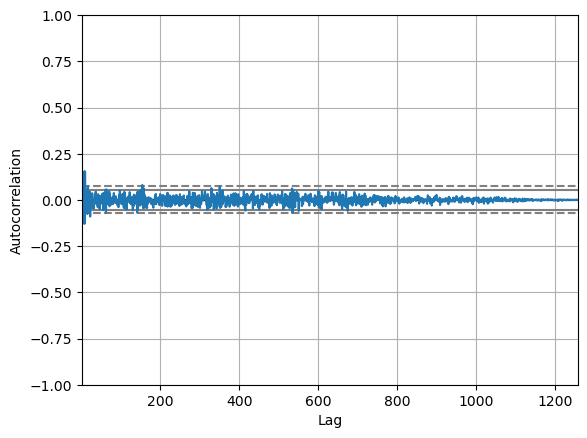

In [126]:
from pandas.plotting import autocorrelation_plot
# First difference to remove trend
df_diff = df['Adj Close**'].diff().dropna()

# Optional: check autocorrelation
autocorrelation_plot(df_diff)
plt.show()

In [128]:
model = ARIMA(df['Adj Close**'], order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            Adj Close**   No. Observations:                 1258
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -9162.349
Date:                Sun, 20 Apr 2025   AIC                          18336.699
Time:                        15:51:19   BIC                          18367.518
Sample:                             0   HQIC                         18348.282
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1086      0.016     -6.733      0.000      -0.140      -0.077
ar.L2          0.0887      0.015      5.884      0.000       0.059       0.118
ar.L3         -0.0103      0.018     -0.587      0.5

In [132]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Ensure datetime index
df.index = pd.to_datetime(df.index)
forecast = model_fit.forecast(steps=30)
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')

# Convert to DataFrame for plotting
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])

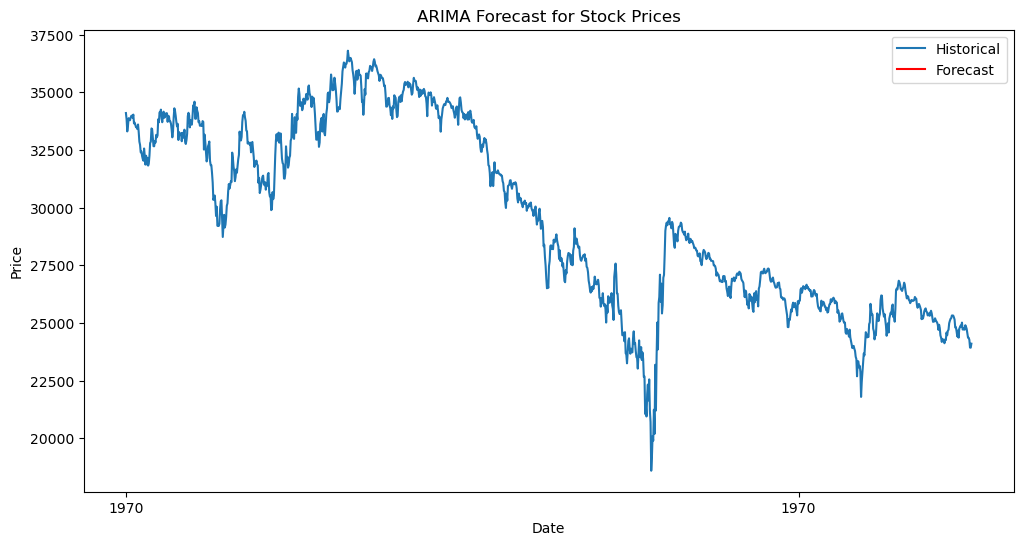

In [134]:
plt.figure(figsize=(12,6))
plt.plot(df['Adj Close**'], label='Historical')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('ARIMA Forecast for Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()